In [33]:
import pandas as pd  

import numpy as np

import matplotlib.pyplot as plt

import pylab as pl
%matplotlib inline

import scipy.optimize as opt

In [34]:
#loading file
data=pd.read_csv("ChurnData.csv")

In [35]:
#viewing labels
data.head()



,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [36]:
#no of cols and rows

data.shape

(200, 28)

In [37]:
#Data pre-processing and selection

#Let's select some features for the modeling. Also, we change the target data type to be an integer, as it is a requirement by the skitlearn algorithm:


data=data[['tenure','age','address','income','ed','employ','equip','callcard','wireless','churn']]

data['churn']=data['churn'].astype('int')

data.head()





,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [38]:
data.shape

(200, 10)

In [39]:
#defining X and Y for our datasets

x=np.asarray(data[['tenure','age','address','income','ed','employ','equip']])
x[0:5]


array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [40]:
y=np.asarray(data['churn'])

y[0:5]

array([1, 1, 0, 0, 0])

In [41]:
#Normalizing the data set

from sklearn import preprocessing

x=preprocessing.StandardScaler().fit(x).transform(x)

x[0:5]


array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

In [42]:

#TEST TRAIN SPLIT

from sklearn.model_selection import train_test_split

x_test,x_train,y_test,y_train= train_test_split(x,y,test_size=0.2,random_state=4)

print("Train set:",x_train.shape,y_train.shape)

print("Test set:",x_test.shape,y_test.shape)


Train set: (40, 7) (40,)
Test set: (160, 7) (160,)


In [43]:
#Modeling

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

LR=LogisticRegression(C=0.01,solver='liblinear').fit(x_train,y_train)

LR

LogisticRegression(C=0.01, solver='liblinear')

In [44]:
#PREDICT

yhat=LR.predict(x_test)
yhat

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1])

In [45]:
#predict proba

yhat_proba=LR.predict_proba(x_test)

yhat_proba

array([[0.56, 0.44],
       [0.48, 0.52],
       [0.53, 0.47],
       [0.52, 0.48],
       [0.54, 0.46],
       [0.45, 0.55],
       [0.63, 0.37],
       [0.57, 0.43],
       [0.56, 0.44],
       [0.62, 0.38],
       [0.52, 0.48],
       [0.63, 0.37],
       [0.48, 0.52],
       [0.46, 0.54],
       [0.49, 0.51],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.48, 0.52],
       [0.52, 0.48],
       [0.46, 0.54],
       [0.43, 0.57],
       [0.47, 0.53],
       [0.6 , 0.4 ],
       [0.48, 0.52],
       [0.48, 0.52],
       [0.46, 0.54],
       [0.5 , 0.5 ],
       [0.47, 0.53],
       [0.42, 0.58],
       [0.45, 0.55],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.44, 0.56],
       [0.52, 0.48],
       [0.62, 0.38],
       [0.48, 0.52],
       [0.57, 0.43],
       [0.45, 0.55],
       [0.48, 0.52],
       [0.46, 0.54],
       [0.55, 0.45],
       [0.48, 0.52],
       [0.45, 0.55],
       [0.51, 0.49],
       [0.51, 0.49],
       [0.6 , 0.4 ],
       [0.68, 0.32],
       [0.53,

In [46]:
#evaluation

from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.5819672131147541

In [47]:
#compute confusion matrix


cnf_matrix=confusion_matrix(y_test,yhat,labels=[0,1])
np.set_printoptions(precision=2)




In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[38  5]
 [46 71]]


Confusion matrix, without normalization
[[71 46]
 [ 5 38]]


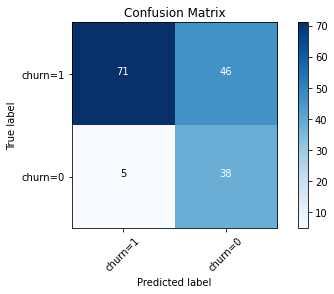

In [49]:
#Plot non-normalized confusion matrix

plt.figure()

plot_confusion_matrix(cnf_matrix,classes=['churn=1','churn=0'],normalize=False, title='Confusion Matrix')

In [50]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74       117
           1       0.45      0.88      0.60        43

    accuracy                           0.68       160
   macro avg       0.69      0.75      0.67       160
weighted avg       0.80      0.68      0.70       160



In [51]:
#log loss

#Now, let's try log loss for evaluation. 
# In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). 
# This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1.

from sklearn.metrics import log_loss

log_loss(y_test,yhat_proba)



0.6520302121347883